The MNIST handwritten digit classification problem is a standard dataset used in Computer Vision and Deep Learing Models.
Here we will harness the power of Neural Networks to build a deep learning model and train it for recognising __Handwritten Digits__. <br>
__NOTE__:The recognised digit is shown as a plot(digits vs probability).


In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import helper

#Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
            transforms.Normalize((0.5,),(0.5,)),                    
            ])
#Downloading and training the dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train= True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

In [4]:
#Building a feed-forward model

model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))
#Defining Loss
criterion = nn.NLLLoss()

#Getting the data
images, lables = next(iter(trainloader))

#Flatening the images
images = images.view(images.shape[0], -1)

#forward pass and get our probabilities(because of Softmax use in model)
logpbs = model(images)

#Calculating loss
loss = criterion(logpbs, lables)
print('Before Backward:\n', model[0].weight.grad)
loss.backward()
print('After Backward:\n', model[0].weight.grad)

Before Backward:
 None
After Backward:
 tensor([[-3.4123e-04, -3.4123e-04, -3.4123e-04,  ..., -3.4123e-04,
         -3.4123e-04, -3.4123e-04],
        [ 4.7934e-04,  4.7934e-04,  4.7934e-04,  ...,  4.7934e-04,
          4.7934e-04,  4.7934e-04],
        [-3.6934e-05, -3.6934e-05, -3.6934e-05,  ..., -3.6934e-05,
         -3.6934e-05, -3.6934e-05],
        ...,
        [-3.2808e-04, -3.2808e-04, -3.2808e-04,  ..., -3.2808e-04,
         -3.2808e-04, -3.2808e-04],
        [ 1.5916e-03,  1.5916e-03,  1.5916e-03,  ...,  1.5916e-03,
          1.5916e-03,  1.5916e-03],
        [ 4.8313e-05,  4.8313e-05,  4.8313e-05,  ...,  4.8313e-05,
          4.8313e-05,  4.8313e-05]])


In [5]:
print('Initial weights - ', model[0].weight)

optimizer = optim.SGD(model.parameters(), lr = 0.01)


images, labels = next(iter(trainloader))

images = images.view(images.shape[0], -1)

optimizer.zero_grad()

logpbs = model(images)
loss = criterion(logpbs, labels)
loss.backward()
print('Final weights - ', model[0].weight.grad)

optimizer.step()
print('Final weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 1.3677e-02,  2.4260e-02, -3.5367e-02,  ..., -1.6010e-02,
         -1.3083e-03,  1.0492e-02],
        [-9.9794e-03, -7.0698e-03,  1.7925e-02,  ..., -2.9919e-02,
          2.4530e-02,  9.7589e-03],
        [ 8.0705e-05,  1.8660e-02,  2.0134e-02,  ...,  2.2551e-03,
          3.0703e-02, -1.4037e-03],
        ...,
        [-2.7701e-03, -1.9501e-02, -6.4204e-03,  ..., -3.4450e-02,
         -8.9416e-03,  4.0112e-03],
        [-1.1003e-04, -3.2806e-02,  1.4117e-02,  ..., -1.5962e-02,
         -2.5671e-02,  2.3669e-02],
        [-3.0489e-02, -3.0313e-02, -6.8728e-04,  ..., -8.8647e-03,
          2.1068e-02,  1.6244e-03]], requires_grad=True)
Final weights -  tensor([[ 7.3269e-04,  7.3269e-04,  7.3269e-04,  ...,  7.3269e-04,
          7.3269e-04,  7.3269e-04],
        [-1.0237e-03, -1.0237e-03, -1.0237e-03,  ..., -1.0237e-03,
         -1.0237e-03, -1.0237e-03],
        [ 8.2413e-05,  8.2413e-05,  8.2413e-05,  ...,  8.2413e-05,
          8.2413e

In [6]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print(f"Training loss: , {running_loss/len(trainloader)}")

Training loss: , 1.8897874332440179
Training loss: , 0.835665123326692
Training loss: , 0.5341162552902186
Training loss: , 0.4360401889980475
Training loss: , 0.3892162507022622


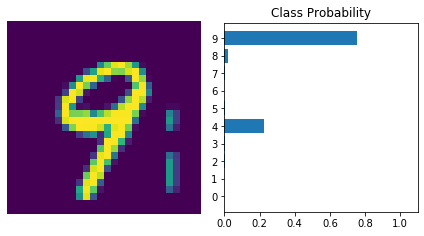

In [22]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)